In [1]:
#Some very important libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates
import seaborn as sns

In [2]:
#Basic Dataset - Movielens

movies=pd.read_csv("./ml-dataset/movies.csv")

In [3]:
#Checking if everything was loaded properly

movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
#Loading a table that will enable us to link the data in the Movielens Dataset with the TMDB Dataset

links=pd.read_csv("./ml-dataset/links.csv")
links["tmdbId"]=links.tmdbId.fillna(0.0).astype(int)
links.head(10)
len(links)

27278

In [5]:
#Loading the file that contains the ratings each Movielens user gave each of the films he/she watched

ratings=pd.read_csv("./ml-dataset/ratings.csv")

#Changing the timestamp to a more readable format

ratings["timestamp"]=pd.to_datetime(ratings["timestamp"],unit='s')

ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [6]:
#Importing the library for regular expressions
import re

#Extracting the release year of the movie based on the Title column, that contains the release year in parenthesis
movies['release_year'] = movies['title'].str.strip().str.extract(r'^.*(\d{4})(.*)$')[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """


In [7]:
movies.head(10)

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


In [8]:
#Transforming the genres into a list
genres=movies["genres"]
genre=list(genres)
genres_list=[]
for g in genre:
    items=g.split("|")
    for item in items:
        if item in genres_list:
            pass
        else:
            genres_list.append(item)
print(genres_list)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']


In [9]:
#Creating a binary column for each genre
for genre in genres_list:
    movies[genre]=0
    
#Populating the genre binary columns. If the film is within the genre, 1, if not, 0
for i in range(len(movies)):
    for nm in genres_list:
        if nm in movies.iloc[i]["genres"]:
            movies.loc[i,nm]=1
        else:
            pass
movies.head(10)

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,1995,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Changing the genres column to display a list of genres instead of a pipe separated string
def change_display(genre):
    return list(genre.split('|'))

movies["genres"]=movies["genres"].apply(change_display)

movies.head(10)

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),"[Action, Crime, Thriller]",1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),"[Comedy, Romance]",1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),"[Adventure, Children]",1995,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),[Action],1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),"[Action, Adventure, Thriller]",1995,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Getting the data we need to evaluate movies per genre over the years

movie_year_analysis=movies.iloc[:,3:24].copy()
movie_year_analysis.head()

,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1995,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1995,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Aggregating the number of films of each genre per year by counting non zeros in each genre for each year

year_genre = movie_year_analysis.groupby(movie_year_analysis.release_year).agg(np.count_nonzero)
year_genre.head(10)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
release_year,,,,,,,,,,,,,,,,,,,,
1891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1895,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1896,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1898,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
1899,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


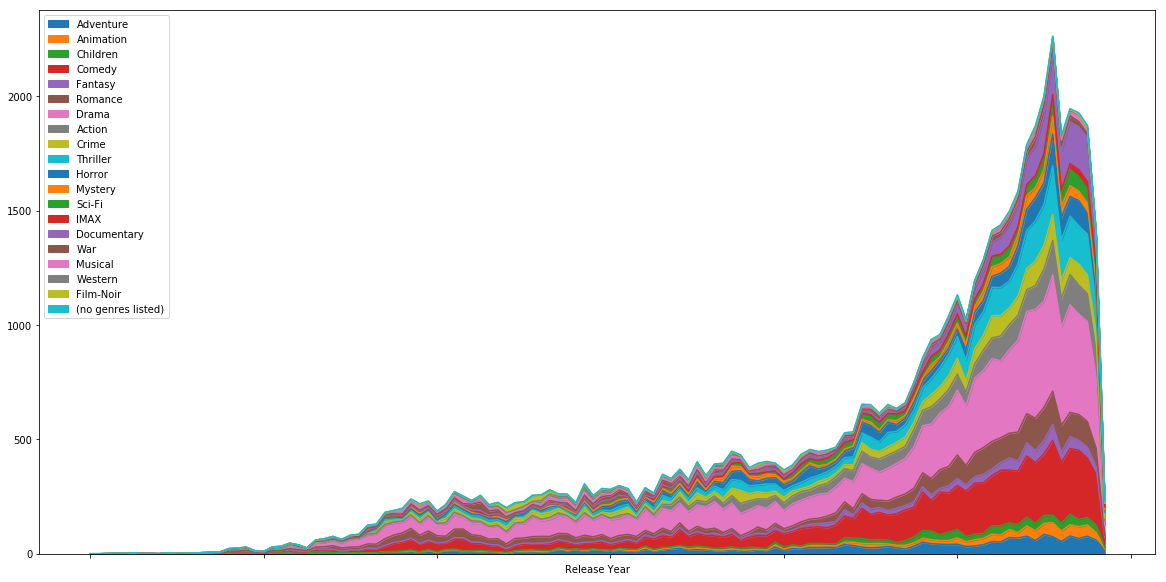

In [13]:
#Plotting the movies per genre per year in a stacked area chart

plt.figure()

year_genre.plot.area(stacked=True,figsize=(20,10)).set_xlabel("Release Year")
plt.show()

In [14]:
#Aggregating ratings: avg rating per movie and number of reviews per movie
f= {'userId': np.count_nonzero,
    'rating': np.mean}
movie_ratings=ratings.groupby(ratings.movieId).agg(f)

movie_ratings.rename(columns={'userId':'movielens_number_reviews','rating':'movielens_avg_rating'},inplace=True)
movie_ratings.head(10)

,movielens_number_reviews,movielens_avg_rating
movieId,,
1,49695,3.921240
2,22243,3.211977
3,12735,3.151040
4,2756,2.861393
5,12161,3.064592
6,23899,3.834930
7,12961,3.366484
8,1415,3.142049
9,3960,3.004924


In [15]:
movies.set_index('movieId', inplace=True)

#Joined dataset
movies=movies.join(movie_ratings)
movies.head(10)

,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,49695.0,3.921240
2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,22243.0,3.211977
3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,12735.0,3.151040
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,2756.0,2.861393
5,Father of the Bride Part II (1995),[Comedy],1995,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,12161.0,3.064592
6,Heat (1995),"[Action, Crime, Thriller]",1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23899.0,3.834930
7,Sabrina (1995),"[Comedy, Romance]",1995,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,12961.0,3.366484
8,Tom and Huck (1995),"[Adventure, Children]",1995,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1415.0,3.142049
9,Sudden Death (1995),[Action],1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3960.0,3.004924


In [16]:
#Correcting the type of the variables

movies["movielens_number_reviews"]=movies.movielens_number_reviews.fillna(0.0).astype(int)
movies["release_year"]=movies.release_year.fillna(0.0).astype(int)

In [17]:
movies.head(10)

,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,49695,3.921240
2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,22243,3.211977
3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,12735,3.151040
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,2756,2.861393
5,Father of the Bride Part II (1995),[Comedy],1995,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,12161,3.064592
6,Heat (1995),"[Action, Crime, Thriller]",1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23899,3.834930
7,Sabrina (1995),"[Comedy, Romance]",1995,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,12961,3.366484
8,Tom and Huck (1995),"[Adventure, Children]",1995,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1415,3.142049
9,Sudden Death (1995),[Action],1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3960,3.004924


In [18]:
#Filtering only movies that came out on the past ten years

movies_smp=movies[movies.release_year>=2008].copy()
movies_smp.head(10)

,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating
movieId,,,,,,,,,,,,,,,,,,,,,
53207,88 Minutes (2008),"[Crime, Drama, Mystery, Thriller]",2008,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,628,2.935510
55603,My Mom's New Boyfriend (2008),"[Action, Comedy, Romance, Thriller]",2008,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,59,2.923729
55830,Be Kind Rewind (2008),[Comedy],2008,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1511,3.230642
56949,27 Dresses (2008),"[Comedy, Romance]",2008,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,2108,3.170066
57326,In the Name of the King: A Dungeon Siege Tale ...,"[Action, Adventure, Fantasy]",2008,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,241,2.062241
57368,Cloverfield (2008),"[Action, Mystery, Sci-Fi, Thriller]",2008,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3403,3.378636
57370,Mad Money (2008),"[Comedy, Crime, Thriller]",2008,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,137,2.795620
57520,One Missed Call (2008),"[Horror, Mystery, Thriller]",2008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,170,2.285294
57522,First Sunday (2008),"[Comedy, Crime]",2008,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,42,2.369048


In [19]:
len(movies_smp)

6964

In [20]:
#Setting the movieId as the index to facilitate the joining

links.set_index('movieId',inplace=True)
movies_smp=movies_smp.join(links)

movies_smp.head(10)

,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating,imdbId,tmdbId
movieId,,,,,,,,,,,,,,,,,,,,,
53207,88 Minutes (2008),"[Crime, Drama, Mystery, Thriller]",2008,0,0,0,0,0,0,1,...,0,0,0,0,0,0,628,2.935510,411061,3489
55603,My Mom's New Boyfriend (2008),"[Action, Comedy, Romance, Thriller]",2008,0,0,0,1,0,1,0,...,0,0,0,0,0,0,59,2.923729,780534,9262
55830,Be Kind Rewind (2008),[Comedy],2008,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1511,3.230642,799934,4953
56949,27 Dresses (2008),"[Comedy, Romance]",2008,0,0,0,1,0,1,0,...,0,0,0,0,0,0,2108,3.170066,988595,6557
57326,In the Name of the King: A Dungeon Siege Tale ...,"[Action, Adventure, Fantasy]",2008,1,0,0,0,1,0,0,...,0,0,0,0,0,0,241,2.062241,460780,2312
57368,Cloverfield (2008),"[Action, Mystery, Sci-Fi, Thriller]",2008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3403,3.378636,1060277,7191
57370,Mad Money (2008),"[Comedy, Crime, Thriller]",2008,0,0,0,1,0,0,0,...,0,0,0,0,0,0,137,2.795620,951216,12085
57520,One Missed Call (2008),"[Horror, Mystery, Thriller]",2008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,170,2.285294,479968,6933
57522,First Sunday (2008),"[Comedy, Crime]",2008,0,0,0,1,0,0,0,...,0,0,0,0,0,0,42,2.369048,486578,14423


In [23]:
#Importing the library that will enable us to check the TMDB database

import tmdbsimple as tmdb

tmdb.API_KEY='503f4a91f52e1d00919f3ac94477e13f'
movies_list=list(movies_smp['tmdbId'])
movie = tmdb.Movies(603)
response = movie.info()
movie.credits()['cast']

[{'cast_id': 34,
  'character': 'Thomas Anderson / Neo',
  'credit_id': '52fe425bc3a36847f80181c1',
  'gender': 2,
  'id': 6384,
  'name': 'Keanu Reeves',
  'order': 0,
  'profile_path': '/bOlYWhVuOiU6azC4Bw6zlXZ5QTC.jpg'},
 {'cast_id': 21,
  'character': 'Morpheus',
  'credit_id': '52fe425bc3a36847f801818d',
  'gender': 2,
  'id': 2975,
  'name': 'Laurence Fishburne',
  'order': 1,
  'profile_path': '/8suOhUmPbfKqDQ17jQ1Gy0mI3P4.jpg'},
 {'cast_id': 22,
  'character': 'Trinity',
  'credit_id': '52fe425bc3a36847f8018191',
  'gender': 1,
  'id': 530,
  'name': 'Carrie-Anne Moss',
  'order': 2,
  'profile_path': '/6gk8GmlfjW8ONS19KMeISp8Cqxf.jpg'},
 {'cast_id': 23,
  'character': 'Agent Smith',
  'credit_id': '52fe425bc3a36847f8018195',
  'gender': 2,
  'id': 1331,
  'name': 'Hugo Weaving',
  'order': 3,
  'profile_path': '/ysED1kp94bpnweNVaDoVQQ6iy8X.jpg'},
 {'cast_id': 25,
  'character': 'Cypher',
  'credit_id': '52fe425bc3a36847f801819d',
  'gender': 2,
  'id': 532,
  'name': 'Joe Pant

In [24]:
#We are going to get info and cast from the TMDB Database. The empty lists will receive the values accordingly to the TMDB ID in the main dataset

movies_info_tmdb=[]
movies_cast=[]

#Checking each of the TMDB IDs in the main dataset to retrieve information from the TMDB API
for ind in movies_list:
    #The print statements are just for us to check if everything is running smoothly
    try:
        movie = tmdb.Movies(ind)
        response = movie.info()
        movies_info_tmdb.append(response)
        movies_cast.append(movie.credits()['cast'])
        print(movie.title)
    except:
        movies_info_tmdb.append('?')
        movies_cast.append('?')
        print('?')

88 Minutes
My Mom's New Boyfriend
Be Kind Rewind
27 Dresses
In the Name of the King: A Dungeon Siege Tale
Cloverfield
Mad Money
One Missed Call
First Sunday
Untraceable
Rambo
Meet the Spartans
The Eye
Strange Wilderness
Over Her Dead Body
Hellboy II: The Golden Army
In Bruges
Welcome Home Roscoe Jenkins
Fool's Gold
Jumper
Definitely, Maybe
Vantage Point
The Spiderwick Chronicles
Step Up 2: The Streets
Jodhaa Akbar
Witless Protection
The Other Boleyn Girl
Semi-Pro
College Road Trip
10,000 BC
The Bank Job
Doomsday
Horton Hears a Who!
The Love Guru
VeggieTales: The Pirates Who Don't Do Anything
Justice League: The New Frontier
What Just Happened
Miss Pettigrew Lives for a Day
The Dark Knight
Never Back Down
CJ7
Drillbit Taylor
21
Smart People
The Shepherd: Border Patrol
Leatherheads
Stop-Loss
Shine a Light
The Business of Being Born
Julia
Just Anybody
Nim's Island
The Ruins
Forgetting Sarah Marshall
Superhero Movie
Street Kings
Harold & Kumar Escape from Guantanamo Bay
Speed Racer
Diminis

Billu
Ricky Rapper
New in Town
Dead Snow
Land of the Lost
The Clique
Fatso
Momma's Man
Imagine That
The Taking of Pelham 1 2 3
Flame & Citron
In Therapy
American Violet
Suspect X
The Stoning of Soraya M.
The Proposal
Year One
Tyson
Garfield's Pet Force
The Hurt Locker
Tu£sday
The Limits of Control
Transformers: Revenge of the Fallen
Home
Tulpan
Phoebe in Wonderland
Whatever Works
Ghosts of Girlfriends Past
Public Enemies
Ice Age: Dawn of the Dinosaurs
120
Prison Break: The Final Break
Samson and Delilah
My Sister's Keeper
Kambakkht Ishq
Tales of the Black Freighter
(500) Days of Summer
Brüno
The Boys: The Sherman Brothers' Story
1939: Hollywood's Greatest Year
The Librarian: The Curse of the Judas Chalice
The Inhabited Island
Franklyn
Iron Maiden: Flight 666
Good Dick
Harry Potter and the Half-Blood Prince
Who Killed Nancy?
My Sassy Girl
The Imaginarium of Doctor Parnassus
9to5: Days in Porn
Shiver
Winter of Frozen Dreams
Humpday
Tokyo Sonata
Polytechnique
Visioneers
Streets of Blood
C

Date Night
After.Life
?
Sex Positive
Terry Fator: Live from Las Vegas
Oneechanbara The Movie
Don McKay
Taqwacore: The Birth of Punk Islam
Steam of Life
The Final
Peacock
The Runaways
Rembrandt's J'Accuse...!
Cape No. 7
The Black Waters of Echo's Pond
Cooking With Stella
Until the Light Takes Us
Angel of Death
Waking Sleeping Beauty
Affinity
?
The Ascent of Money
Death at a Funeral
Valhalla Rising
Diary of a Wimpy Kid
Skin
I Am Love
Circle of Eight
Disgrace
For the Love of Movies: The Story of American Film Criticism
LEGO: The Adventures of Clutch Powers
American Virgin
Dogtooth
Genova
City of Life and Death
?
?
The Dunwich Horror
As Good As Dead
Achilles and the Tortoise
Bananas!*
?
The Losers
Tenure
The Last Song
Cyrus
The Human Centipede (First Sequence)
Exit Through the Gift Shop
Julia Sweeney - Letting Go of God
Solomon Kane
Iron Man 2
Lebanon
Reindeerspotting: Escape from Santaland
Marmaduke
MacGruber
Ca$h
The Sky Crawlers
Vengeance
?
Bitten
Big River Man
Virtuality
The Good Heart

Lovers of Hate
The Tourist
Chatroom
Suck
Rare Exports: A Christmas Tale
13
The Human Experience
Breaking the Maya Code
Father of My Children
Honey
Boy Interrupted
Rammbock: Berlin Undead
Hatchet II
All Good Things
Night Catches Us
The Interrogation
The Last Summer of La Boyita
Pray the Devil Back to Hell
Tomorrow, When the War Began
I Love You Too
True Grit
TRON: Legacy
Another Year
How Do You Know
Barney's Version
The Company Men
Dying Breed
Mother and Child
Adventures of Power
How to Seduce Difficult Women
Life in Flight
I Saw the Devil
Unmade Beds
Trash Humpers
We Are the Night
Faster
Little Big Soldier
Rabbit Hole
Nights and Weekends
The Lottery
Little Fockers
Gulliver's Travels
Sweetgrass
Moonlight Serenade
Klown
Nude Nuns with Big Guns
The Last Circus
The Most Dangerous Man in America: Daniel Ellsberg and the Pentagon Papers
Tere Bin Laden
The Scientist
White Material
And Soon the Darkness
Mao's Last Dancer
Burlesque
Violet Tendencies
The Secret World of Arrietty
Tucker and Dale 

The Guard
Griff the Invisible
Quarantine 2: Terminal
Earth Days
Winnie the Pooh
Peep World
The Woman
Frontier of the Dawn
No Impact Man
Beverly Hills Chihuahua 2
A Year Ago in Winter
The Four Times
The Sleeping Beauty
Almighty Thor
The Smurfs
Reparando
?
Dylan Dog: Dead of Night
Angel of Mine
The Undefeated
Friends with Benefits
The Dust of Time
3 Backyards
Small Town Murder Songs
Paper Birds
Last Stop 174
Waking Madison
The Possession of David O'Reilly
Alpha and Omega
Legend of the Fist: The Return of Chen Zhen
Blitz
Our Beloved Month of August
The Autobiography of Nicolae Ceausescu
Mysteries of Lisbon
Oki's Movie
FRED: The Movie
Me Too
The Yellow Sea
La nostra vita
Come Undone
Adopted
Rapt
Sweet Rush
The Blind Sunflowers
Change of Plans
Our Idiot Brother
Almanya: Welcome to Germany
A Letter to Elia
Drive-In Horrorshow
Twixt
Princess Ka'iulani
Death Race 2
Cyberbully
Beats Rhymes & Life: The Travels of A Tribe Called Quest
Wandering Streams
West Is West
Rise of the Planet of the Apes


Safe House
The Vow
Swamp Shark
Louis C.K.: Live at the Beacon Theater
As Luck Would Have It
The Black Power Mixtape 1967-1975
At Home by Myself... with You
Monsieur Lazhar
?
For a Good Time, Call...
Casey Jones
Janie Jones
Journey 2: The Mysterious Island
Perfect Sense
The Shrine
Johnny Cash at Folsom Prison
The Artist
Tim and Eric's Billion Dollar Movie
Beautiful Kate
Chapiteau-Show
Sommer der Gaukler
Kokowääh
When Love Is Not Enough: The Lois Wilson Story
Sixpack
The City Dark
?
Oka!
Bombay Beach
Bodyguards and Assassins
The Sorcerer and the White Snake
Flying Swords of Dragon Gate
Smokin' Aces 2: Assassins' Ball
Knuckle
Winter in Wartime
Ricky Rapper and the Bicycle Thief
Plans for Tomorrow
Le 7ème juré
We Were Here
The Hunter
The Dead
Ghost Rider: Spirit of Vengeance
A Monster in Paris
Prayers for Bobby
Bustin' Down the Door
The World According to Ion B.
A Very Potter Musical
A Very Potter Sequel
Once Upon a Time in the North
Miss Nobody
Retreat
Guy and Madeline on a Park Bench
Oct

Stag Night
Hollywood Sex Wars
Something Ventured
Jesus Henry Christ
Resident Evil: Retribution
Trouble with the Curve
360
Suicide Club
Under African Skies
Lola Versus
The Master
Dredd
247°F
Arbitrage
Blue Like Jazz
The Friends at the Margherita Cafe
Detropia
The Liquidator
The Chemical Brothers: Don't Think
ChromeSkull: Laid to Rest 2
Dolan's Cadillac
Breathless
Blood Money
End of Watch
V/H/S
Boxing Gym
The Perks of Being a Wallflower
The Hunt
Holy Motors
Knuckleball!
Either Way
The Hunter
Behind the Burly Q
Two Rabbits
Sparkle
Thin Ice
Red Lights
The Rocky Saga: Going the Distance
Taken 2
The Paperboy
Shut Up and Play the Hits
One Nine Nine Four
Bleach: Fade to Black
In Passing
Nanayo
Road North
A Royal Affair
House at the End of the Street
Attack of the 50 Foot Cheerleader
2-Headed Shark Attack
The Newest Pledge
?
?
2016: Obama's America
A Happy Event
Love Lasts Three Years
Volcano
Presumed Guilty
Surviving Progress
The Tall Man
Laurence Anyways
The Magic of Belle Isle
The Lie
LOL
Th

Le Chef
Punching the Clown
Tale of a Forest
Choose
Movie 43
?
Death Race: Inferno
Jean Gentil
The Pervert's Guide to Ideology
Parker
We the Party
A Simple Life
Treacle Jr.
The End of Love
The Color Wheel
The Green Wave
?
Sightseers
Oppai Volleyball
Hansel & Gretel: Witch Hunters
Murder by Proxy:  How America Went Postal
After Porn Ends
Stonehenge Apocalypse
The Last Godfather
Portrait of Wally
Starlet
Palme
Poor Us: An Animated History of Poverty
Jim Jefferies: Fully Functional
?
Wild Horse, Wild Ride
God Save My Shoes
Why Stop Now?
The Big Picture
The East
Pretty Sweet
Lo
The Karlsson Brothers
Beyond the Hill
Modest Reception
Day Is Done
Love Likes Coincidences
Blancanieves
Return
Tabu
Head Games
Pink Ribbons, Inc.
Ballplayer
The Erotic Man
All That I Love
Upside Down
The Liability
Butchered
The Baytown Outlaws
LUV
Stand Up Guys
Le grand soir
Udaan
No
Finding Joy
Now Is Good
The Haunting in Connecticut 2: Ghosts of Georgia
The Adonis Factor
Resident Evil: Degeneration
Call Me Kuchu
St

The Best Offer
Sassy Pants
World War Z
Elysium
Dirty Wars
Unconditional
We Steal Secrets: The Story of WikiLeaks
?
What Maisie Knew
Dragon Hunter
Shark Alarm at Müggel Lake
The Revisionaries
American Mary
Liz & Dick
Yamla Pagla Deewana 2
Europa Report
Odd Thomas
Jim Gaffigan: Mr. Universe
The Sound of Insects: Record of a Mummy
Blutzbrüdaz
Despicable Me 2
White House Down
The World's End
Keith Lemon: The Film
Back to 1942
Hummingbird
Love and Lemons
The Hounds
The Heat
May I Kill U?
The Last Seven
The Lone Ranger
Happiness Never Comes Alone
My Perestroika
Flicker
Hong Kong Confidential
The Thieves
Woody Allen: A Documentary
Passion
Pussy Riot: A Punk Prayer
Batman Unmasked: The Psychology of the Dark Knight
Call Girl
How to Make Money Selling Drugs
The Stig-Helmer Story
V/H/S/2
Arctic Blast
Gideon's Army
The Knot
Cottage Country
Food Matters
ICHI
Inadequate People
The Spectacular Now
Thanks for Sharing
The Lifeguard
Ed Hardy: Tattoo the World
Vile
What's in a Name
?
A Hijacking
Tell Me

Great Expectations
Somm
Amber Alert
Free Birds
Boy Wonder
Bed & Breakfast
In Tranzit
Things We Do for Love
Last Vegas
Muscle Shoals
?
So Young
The Starving Games
Apartment 4E
?
Panic Button
Painless
Card Subject To Change
Making the Boys
Seduced and Abandoned
Absent
The Institute
Dreamworld
For Those in Peril
Philomena
The Book Thief
The Best Man Holiday
Chicago Overcoat
Ida
Metal Brothers
Aningaaq
One Piece Film Strong World
One Piece Film Z
Caught Inside
The Hunger Games: Catching Fire
The Hobbit: The Desolation of Smaug
47 Ronin
The Girl from Nowhere
The Chameleon
The Dyatlov Pass Incident
Governor
On Modern Servitude
WikiRebels: The Documentary
Delivery Man
Charlie Countryman
Bad Biology
Krrish 3
Tales from the Organ Trade
Hansel & Gretel
The Happy Poet
Red Flag
Breakout
Twice Born
A Raisin in the Sun
?
A Somewhat Gentle Man
Guilty of Romance
The Wankers
?
Zero 2
José & Pilar
Frozen
9 Month Stretch
Marfa Girl
ThanksKilling
ThanksKilling 3
Circles
Mr. Morgan's Last Love
Shed No Tear

The Pill
First Squad: The Moment of Truth
Particle Fever
Black Heaven
Threads of Destiny
?
Leo's Room
Contracted
The Bag Man
Kai Po Che!
Legend of the BoneKnapper Dragon
Concepción Arenal, la visitadora de cárceles
Obvious Child
Cheap Thrills
The Keeper of Lost Causes
Dead Genesis
Crazy Kind of Love
Dick Figures: The Movie
A Werewolf Boy
Trouble at Timpetill
Carmina and Amen
Bad Country
Special Correspondents
Buddies
Breaking the Taboo
The Man from the Future
A Story of Yonosuke
Elena Undone
Mr. Peabody & Sherman
Under the Skin
Need for Speed
Barefoot
You've Been Trumped
Veronica Mars
8
The Great Passage
Chiko
Bad Words
Son of God
Fightville
You Will Be My Son
Superpower
The Artist and the Model
Sniper: Reloaded
Puss in Boots: The Three Diablos
Head Over Heels
Meu Passado me Condena
My Mom Is a Character
Blood Out
Daylight
The French Minister
?
Why Don't You Play in Hell?
Spanish Affair
Love Simple
On My Way
George & A.J.
Age of Uprising: The Legend of Michael Kohlhaas
Nobody Owns Me
C

Winter Sleep
When I Walk
In Order of Disappearance
Housebound
Zarafa
The Hundred-Foot Journey
Batman: Assault on Arkham
White Frog
Where the Trail Ends
R100
American Revolutionary: The Evolution of Grace Lee Boggs
The Den
Zero Motivation
Free Samples
Jupiter Ascending
Teenage Mutant Ninja Turtles
I'll Follow You Down
Death in Buenos Aires
Who the F**K Is Arthur Fogel
Rob the Mob
The Reckoning
The Giver
The Pretty One
Revenge of the Green Dragons
Cane Toads: The Conquest
What About Dick?
Let's Be Cops
Paradise
My way to Olympia
Far Out Isn't Far Enough: The Tomi Ungerer Story
?
Antboy
Antboy: Revenge of the Red Fury
Appleseed Alpha
Generation Um...
Switch
Bad Johnson
The Inbetweeners 2
Jesse Stone: Thin Ice
State Affairs
The First Man
Age of Tomorrow
The Sacrament
Make Your Move
Sin City: A Dame to Kill For
Authors Anonymous
How to Be a Man
If I Stay
The Other F Word
The Canal
Night Moves
Foreign Letters
Avalon
Proxy
Are You Here
Welcome to New York
Two Days, One Night
Kummeli V
Losers'

Love Sick Love
Double Tide
Doctor Who: The Time of the Doctor
Dolphin Tale 2
Demoted
When the Game Stands Tall
Aashiqui 2
ABCs of Death 2
Neurons to Nirvana
The Last Word
Dream Boy
TBS
Take the Trash
Invisible Ones
Miserere
Queens of the Ring
The New Girlfriend
Sex, Love & Therapy
Bangkok, We Have A Problem!
Ragnarok
A Matador's Mistress
A Kind of America 2
Parasomnia
20th Century Boys - Chapter 1: Beginning of the End
If You Are the One
Virunga
V/H/S: Viral
Running from Crazy
Happiness
Victor and the Secret of Crocodile Mansion
The Boy Who Cried Werewolf
Mr Hockey The Gordie Howe Story
The Heart Machine
Starry Eyes
When Marnie Was There
Lupin the 3rd
The Monkey King
Song of the Sea
Rakuen Tsuihou - Expelled from Paradise
Kiki's Delivery Service
Exit
Tied
The Magic Crystal
Beyond the Lights
Paulette
In the Heart of the Sea
The Tuche Family
Comme les 5 doigts de la main
Iceman
Stockholm Stories
Pressed
A Promise
The Pig
City Slacker
Hello Ladies: The Movie
Codebreaker
Listen Up Philip
L

Rebirth
Pink Saris
The Dancer
Method to the Madness of Jerry Lewis
Princess and the Pony
Sergio
Trust Me
The Message
The Heavy
Kevin Hart: Seriously Funny
One Husband Too Many
Scooby-Doo! Camp Scare
Half of a Yellow Sun
Men to Kiss
Beck 28 - Familjen
Koran by Heart
Jim Norton: Please Be Offended
Tooth Fairy 2
Love's Kitchen
?
Ping Pong Summer
The Captains
The Violent Kind
Ricky Gervais: Out of England
Ice Soldiers
Peter and Vandy
Wicked Blood
Killer Pad
The Search for Santa Paws
Non-Stop
The Underneath
The Little Rascals Save the Day
Monster
Torrente 4: Lethal crisis
Torrente 5
I Want You
Elsa & Fred
Melbourne
Clear History
The Identical
The Gamers: Hands of Fate
Love at First Fight
The Expedition to the End of the World
Jealousy
The Facility
Ironclad 2: Battle for Blood
Jim Jefferies: I Swear to God
Winning Streak
Mischief Night
The Hornet's Nest
My Way
Jewtopia
Nas: Time Is Illmatic
The Hunters
In the Name of the King III
Jim Jefferies: Alcoholocaust
Sybil
Vito
Women Aren't Funny
Shu

Tomie: Unlimited
La Domination Masculine
The Second Best Exotic Marigold Hotel
Piggy
Ugly
Thank You a Lot
Ingenious
JFK: The Smoking Gun
Vuonna 85
George Carlin: It's Bad for Ya!
Slingshot Hip Hop
Island
Parked
Jimi Hendrix: Hear My Train A Comin'
Ismael
Tracers
McFarland, USA
We Always Lie to Strangers
Kids for Cash
Bomber
Missionary
The Forgotten Woman
The Lazarus Effect
Los Flamencos
Unfinished Business
Gods
Mutantes
The Connection
Jacky in the Kingdom of Women
Soulless
Chronic Town
Ghost in the Shell Arise - Border 1: Ghost Pain
About Alex
Dhobi Ghat
Raanjhanaa
Whitey: United States of America v. James J. Bulger
Spare Parts
Bikes vs Cars
LEGO DC Comics Super Heroes: Justice League vs. Bizarro League
Animals United
Tom and Jerry: The Lost Dragon
Floating Skyscrapers
Plastic Paradise: The Great Pacific Garbage Patch
Falcon Rising
Lights Out
Bright Days Ahead
Mardock Scramble: The Second Combustion
Papusza
The Floating Castle
Familiar Ground
Club Sandwich
Butterflies Have No Memories


In [27]:
#This is to add the information we gathered from the TMDB Database in the form of two columns of our main dataset

movies_smp['movielens_info']=movies_info_tmdb
movies_smp['cast']=movies_cast

In [28]:
#movies_smp.head(10)

,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating,imdbId,tmdbId,movielens_info,cast
movieId,,,,,,,,,,,,,,,,,,,,,
53207,88 Minutes (2008),"[Crime, Drama, Mystery, Thriller]",2008,0,0,0,0,0,0,1,...,0,0,0,0,628,2.935510,411061,3489,"{'adult': False, 'backdrop_path': '/gLU169RfA0...","[{'cast_id': 1, 'character': 'Jack Gramm', 'cr..."
55603,My Mom's New Boyfriend (2008),"[Action, Comedy, Romance, Thriller]",2008,0,0,0,1,0,1,0,...,0,0,0,0,59,2.923729,780534,9262,"{'adult': False, 'backdrop_path': '/oCbczxmpLM...","[{'cast_id': 11, 'character': 'Marthy Durand',..."
55830,Be Kind Rewind (2008),[Comedy],2008,0,0,0,1,0,0,0,...,0,0,0,0,1511,3.230642,799934,4953,"{'adult': False, 'backdrop_path': '/4jydtNkMFA...","[{'cast_id': 12, 'character': 'Jerry', 'credit..."
56949,27 Dresses (2008),"[Comedy, Romance]",2008,0,0,0,1,0,1,0,...,0,0,0,0,2108,3.170066,988595,6557,"{'adult': False, 'backdrop_path': '/jwV0wmhEqH...","[{'cast_id': 14, 'character': 'Jane Nichols', ..."
57326,In the Name of the King: A Dungeon Siege Tale ...,"[Action, Adventure, Fantasy]",2008,1,0,0,0,1,0,0,...,0,0,0,0,241,2.062241,460780,2312,"{'adult': False, 'backdrop_path': '/u14b6vdFie...","[{'cast_id': 13, 'character': 'Farmer', 'credi..."
57368,Cloverfield (2008),"[Action, Mystery, Sci-Fi, Thriller]",2008,0,0,0,0,0,0,0,...,0,0,0,0,3403,3.378636,1060277,7191,"{'adult': False, 'backdrop_path': '/6kVVfNT0au...","[{'cast_id': 14, 'character': 'Rob Hawkins', '..."
57370,Mad Money (2008),"[Comedy, Crime, Thriller]",2008,0,0,0,1,0,0,0,...,0,0,0,0,137,2.795620,951216,12085,"{'adult': False, 'backdrop_path': '/A3Zg1wAjAX...","[{'cast_id': 2, 'character': 'Bridget Cardigan..."
57520,One Missed Call (2008),"[Horror, Mystery, Thriller]",2008,0,0,0,0,0,0,0,...,0,0,0,0,170,2.285294,479968,6933,"{'adult': False, 'backdrop_path': '/nLYWGdr9gY...","[{'cast_id': 19, 'character': 'Beth Raymond', ..."
57522,First Sunday (2008),"[Comedy, Crime]",2008,0,0,0,1,0,0,0,...,0,0,0,0,42,2.369048,486578,14423,"{'adult': False, 'backdrop_path': '/agnWagE5al...","[{'cast_id': 1, 'character': 'Durell', 'credit..."


In [29]:

#movies_smp.to_csv('Joined_Dataset.csv')

In [30]:
#Tossing out movies for which we couldn't retrieve information from TMDB
movies_filtered=movies_smp[movies_smp.cast!='?'].copy()

In [32]:
#len(movies_filtered)

6809

In [33]:
#Properly renaming the wrongly named columns

movies_smp.rename(columns={'movielens_info':'tmdb_info','cast':'tmdb_cast'},inplace=True)
movies_filtered.rename(columns={'movielens_info':'tmdb_info','cast':'tmdb_cast'},inplace=True)

In [34]:
#movies_smp.to_csv('Join_TMDB.csv')

#Generating the Joined Dataset we will use later
movies_filtered.to_csv('Join_TMDB_Filtered.csv')